In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
qubits = np.arange(3,25)

In [3]:
one_to_one = np.array([0.139901399612426, 0.308018207550048, 0.313296794891357, 0.424853086471557, 0.530593156814575, 0.778350353240966, 0.795453786849975, 0.795367717742919, 0.919528245925903, 1.1585636138916, 1.36079668998718, 1.37154936790466, 1.6717402935028, 1.93268752098083, 2.1297960281372, 2.18121147155761, 2.31172633171081, 2.74888610839843, 2.92809796333313, 3.22588944435119, 3.44959902763366, 3.58550930023193])

In [4]:
a_star = np.array([0.0294525623321533, 0.031388521194458, 0.0407047271728515, 0.142396926879882, 0.16847825050354, 0.221550464630126, 0.308464765548706, 0.400764465332031, 0.535033464431762, 0.683653593063354, 0.81680417060852, 0.997480392456054, 1.17810797691345, 1.42058801651, 1.6526186466217, 1.95157098770141, 2.2348256111145, 2.5738468170166, 3.04033136367797, 3.50689339637756, 3.68038702011108, 4.01685357093811])

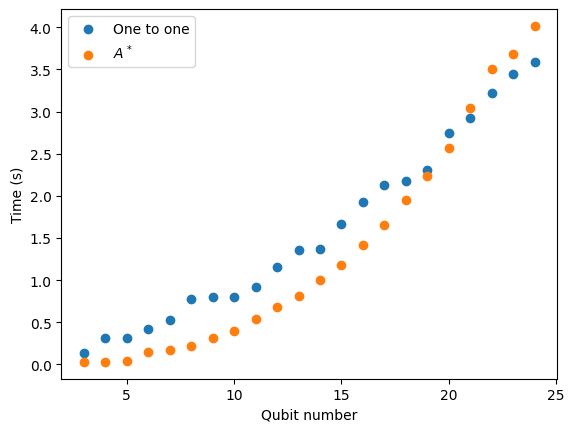

In [5]:
#Super basic plotting
plt.scatter(qubits, one_to_one, label = 'One to one')
plt.scatter(qubits, a_star, label = '$A^*$')
plt.xlabel('Qubit number')
plt.ylabel('Time (s)')
plt.legend()

plt.show()

In [6]:
#Pour fair une regressione exponentielle, on va utiliser curve fit
from scipy.optimize import curve_fit

def fit_func(x, a, b): #curve fit va trouver les parametres de a et b qui vont best fit les points de données à la fonction
    #return a * np.exp(b * x) #En le testant, j'ai vu que cette fonction exponentielle ne fittait pas bien les données
    return a*(x**b)

#Fit for one_to_one
params, covariance = curve_fit(fit_func, qubits, one_to_one)
a_one,b_one = params
print(a_one,b_one)

#Fit for A*
params, covariance = curve_fit(fit_func, qubits, a_star)
a_s, b_s = params
print(a_s, b_s)

0.020781486051454162 1.6237702715960456
0.001008846977137814 2.619228938854156


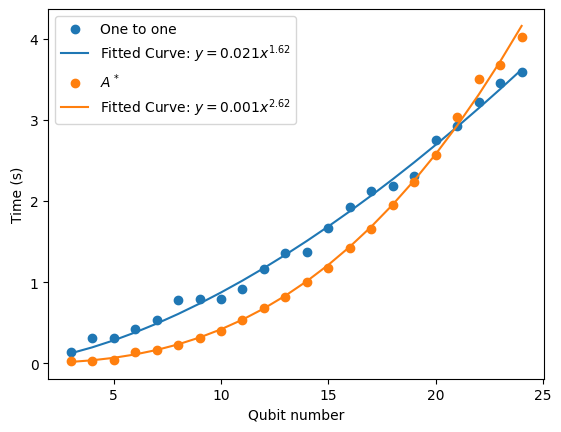

In [7]:
#Plot with the fits
plt.scatter(qubits, one_to_one, label = 'One to one')
plt.plot(qubits, fit_func(qubits, a_one, b_one), label = f"Fitted Curve: $y = {a_one:.3f} x^{{{b_one:.2f} }}$")

plt.scatter(qubits, a_star, label = '$A^*$')
plt.plot(qubits, fit_func(qubits, a_s,b_s), label = f"Fitted Curve: $y = {a_s:.3f} x^{{{b_s:.2f} }}$")
plt.xlabel('Qubit number')
plt.ylabel('Time (s)')
plt.legend()

plt.show()

28.43260762845152